In [194]:
import numpy as np
import imageio.v3 as img
import matplotlib.pyplot as plt

In [195]:
def histogram(img):
    num_levels = int(img.max()) + 1
    hist = np.zeros(num_levels, dtype=int)
    
    for i in range(num_levels):
        hist[i] = np.sum(img == i)
    
    return hist

def hc(img):
    num_levels = int(img.max()) + 1
    hist = histogram(img)
    
    hist_c = np.zeros(num_levels, dtype=int)
    hist_c[0] = hist[0]
    for i in range(1,num_levels):
        hist_c[i] = hist_c[i-1] + hist[i]
        
    return hist_c

def RMSE(H, H_hat):
    N = H.shape[0]
    rmse = np.sqrt( np.sum( np.power( H-H_hat, 2) ) / (N*N) )
    return rmse

def show(img):
    plt.imshow(img, cmap='gray')
    
def compose_superresolution(L):
    l1,l2,l3,l4 = L
    M,N = l1.shape
    
    H = np.zeros((2*M, 2*N))
    for i_M in range(M):
        for j_N in range(N):
            H[2*i_M, 2*j_N] = l1[i_M,j_N]
            H[2*i_M+1, 2*j_N] = l2[i_M,j_N]
            H[2*i_M, 2*j_N+1] = l3[i_M,j_N]
            H[2*i_M+1, 2*j_N+1] = l4[i_M,j_N]
    
    return H

In [196]:
def singleImageCumulativeHistogram(low_img):
    hist_c = hc(low_img)
    L = low_img.max() + 1
    M,N = low_img.shape
    
    img_enhanced = low_img
    for i in range(len(img_enhanced)):
        for j in range(len(img_enhanced[i])):
            pixel = int(img_enhanced[i,j])
            img_enhanced[i,j] = (L-1)/(M*N) * hist_c[pixel]
    
    return img_enhanced
    
def jointCumulativeHistogram(low_img):
    hist_c_joint = hc(low_imgs)
    L = low_img.max() + 1
    M,N = low_img.shape
    
    img_enhanced = low_img
    for i in range(len(img_enhanced)):
        for j in range(len(img_enhanced[i])):
            pixel = int(img_enhanced[i,j])
            img_enhanced[i,j] = (L-1)/(M*N) * hist_c_joint[pixel]
    
    return img_enhanced

def gammaCorrection(low_img):
    img_enhanced = np.floor( 255 * np.power(low_img/255, 1/gamma) )
    return img_enhanced

In [197]:
histogram(np.array([[1,2,3],[2,2,2],[3,3,1]]))

array([0, 2, 4, 3])

In [198]:
hc(np.array([[1,2,3],[2,2,2],[3,3,1]]))

array([0, 2, 6, 9])

In [199]:
a = np.ones((4,2,2))
a[1] = [[2,2],[4,4]]
for i in range(len(a)):
    for j in range(len(a[i])):
        a[i,j] = 4
a

array([[[4., 4.],
        [4., 4.]],

       [[4., 4.],
        [4., 4.]],

       [[4., 4.],
        [4., 4.]],

       [[4., 4.],
        [4., 4.]]])

In [200]:
#### Main Code ####

# imglow = input('imglow')
imglow = '01_low'

size_low = img.imread(imglow + '0.png').shape
low_imgs = np.zeros(np.append(4, size_low))
for i in range(4):
     low_imgs[i] = img.imread(imglow + str(i) + '.png')
#      print('low image', i)
#      show(low_imgs[i])
#      print()

# print(low_imgs.shape, 'shape')
# j = 0
# for low in low_imgs:
#     print('j',j)
#     j+=1
#     print('low',low.min(), low.max())

# imghigh = input('imghigh')
imghigh = '01_high.png'

imghigh = img.imread(imghigh)
# print('high image')
# show(imghigh)

# high = img.imread(imghigh)
# print(high.min(), high.max())

F = input('F')
gamma = input('gamma')

low_imgs_enhanced = low_imgs
if F=='0':
    pass
elif F=='1':
    for i in range(4):
        low_imgs_enhanced[i] = singleImageCumulativeHistogram(low_imgs[i])
elif F=='2':
    for i in range(4):
        low_imgs_enhanced[i] = jointCumulativeHistogram(low_imgs[i])    
elif F=='3':
    for i in range(4):
        low_imgs_enhanced[i] = gammaCorrection(low_imgs[i])        
else:
    raise ValueError('choose a value for F between 0,1,2,3')

img_enhanced_superresolution = compose_superresolution(low_imgs_enhanced)

# for i in range(4):
#      print('enhanced image', i)
#      show(low_imgs_enhanced[i])
#      print()

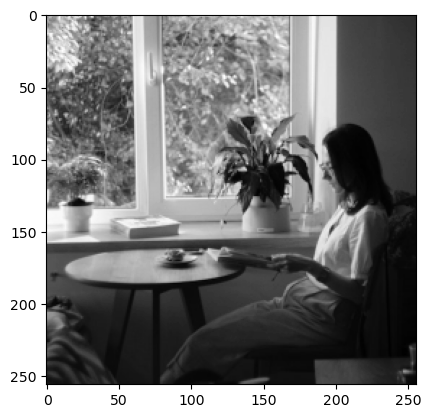

In [201]:
show(low_imgs_enhanced[0])

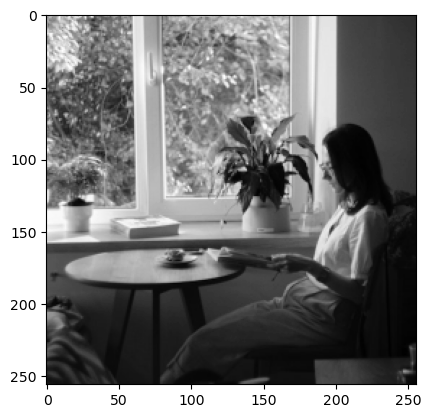

In [202]:
show(low_imgs_enhanced[1])

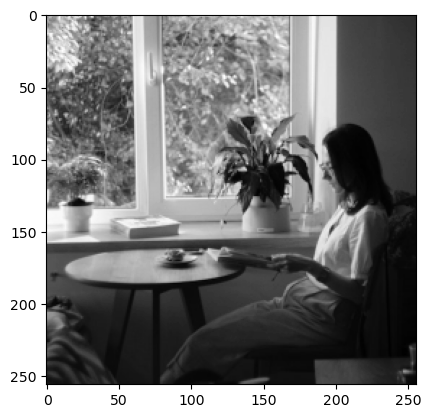

In [203]:
show(low_imgs_enhanced[2])

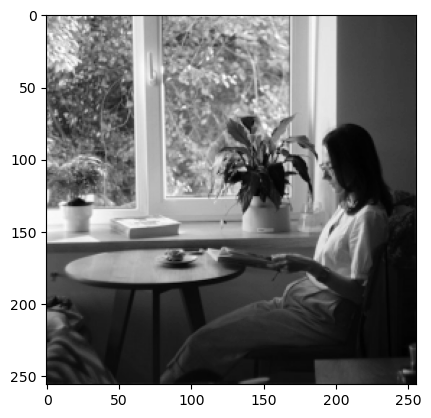

In [204]:
show(low_imgs_enhanced[3]) 

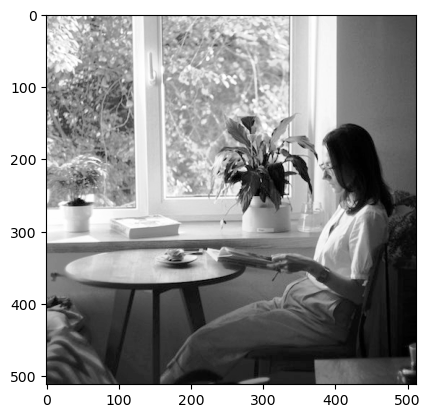

In [205]:
show(imghigh)

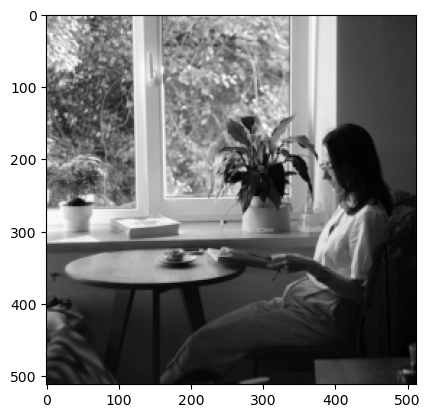

In [206]:
show(img_enhanced_superresolution)

In [207]:
RMSE(imghigh, img_enhanced_superresolution), img_enhanced_superresolution.shape

(17009.704582972627, (512, 512))

In [222]:
l1 = np.array([[1,2],[2,5]])
l2 = np.array([[3,1],[4,4]])
l3 = np.array([[9,8],[1,3]])
l4 = np.array([[2,9],[1,0]])
a = compose_superresolution((l1,l2,l3,l4))
b = np.array([ [1,7,0,11], [1,0,5,13], [7,10,3,2], [2,2,3,7]])
a,b

(array([[1., 9., 2., 8.],
        [3., 2., 1., 9.],
        [2., 1., 5., 3.],
        [4., 1., 4., 0.]]),
 array([[ 1,  7,  0, 11],
        [ 1,  0,  5, 13],
        [ 7, 10,  3,  2],
        [ 2,  2,  3,  7]]))

In [231]:
N = b.shape[0]

In [234]:
np.sum((a-b)**2)/(N*N)

223.0

In [224]:
(a-b)**2

array([[ 0.,  4.,  4.,  9.],
       [ 4.,  4., 16., 16.],
       [25., 81.,  4.,  1.],
       [ 4.,  1.,  1., 49.]])